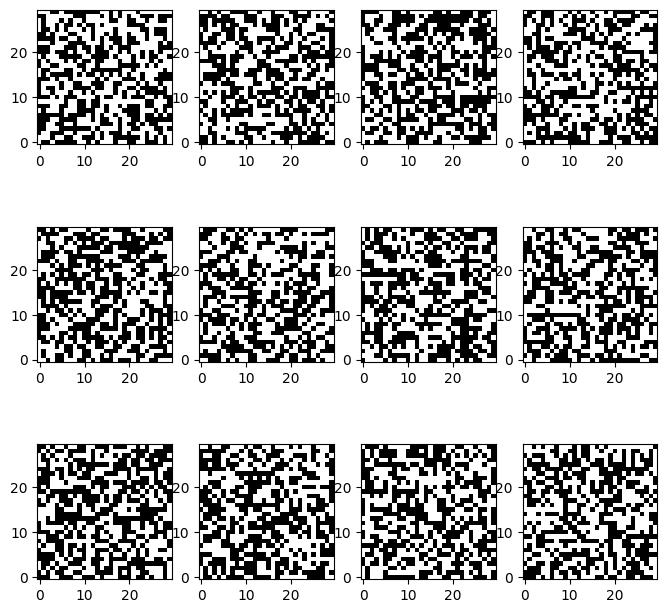

In [300]:
from os import listdir, mkdir
import matplotlib.pyplot as plt
from pathlib import Path

import pandas as pd

random_data_folder = Path("../data/random")
random_data_folder.resolve()
shape = (30, 30)

def flatten_read_image(input_image):
    """

    :param input_image: black and white image imported with plt.imread() function
    :return: array of 0's and 1's describing imported image
    """
    prepared_image = []

    for element in input_image:
        element_flatten = []
        for row in element:
            element_flatten.append(row[0])
        prepared_image.append(element_flatten)

    prepared_image.reverse()
    return prepared_image


def import_images(path):
    imported_images = []

    for file in listdir(path):
        img = plt.imread(path.joinpath(file))
        flatten_image = flatten_read_image(img)
        imported_images.append(flatten_image)

    return imported_images


images = import_images(random_data_folder.joinpath(f"{shape[0]}x{shape[1]}"))
import matplotlib.cm as cm
import math

def show_images(images, color_map):
    plt.figure(figsize=(8, 8))
    columns = 4
    rows = math.ceil(len(images) / columns)
    for i, image in enumerate(images):
        plt.subplot(rows, columns, i + 1)
        plt.imshow(image, interpolation='none', cmap=color_map, origin='lower')
    plt.show()

def show_images_from_flatten_arrays(dataframes, shape, color_map):
    plt.figure(figsize=(8, 8))
    columns = 4
    rows = math.ceil(len(dataframes) / columns)
    for i, dataframe in enumerate(dataframes):
        plt.subplot(rows, columns, i + 1)
        plt.imshow(dataframe.reshape(shape), interpolation='none', cmap=color_map, origin='lower')
    plt.show()

def count_score(reference_images, results):
    score = 0
    for result in results:
        alter_result = result.copy()
        alter_result[alter_result == -1] = 0
        alter_result[alter_result == 1] = -1
        alter_result[alter_result == 0] = 1
        for image in reference_images:
            if (image == result).all():
                score += 1
                break
            elif (image == alter_result).all():
                score += 1
                break

    return score/len(results)


cmap = cm.gray
show_images(images, cmap)

In [301]:
import neurolab as nl
import numpy as np

## Test 01
Easy test with **one** image to learn

In [302]:
train_data01 = images[0]
train_data02 = images[3]

In [303]:
train_data01

[[1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0],
 [1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0],
 [0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0],
 [0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0],
 [0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  

In [304]:
train_images = pd.DataFrame(train_data02)
train_images = np.asarray(train_images)
train_images = train_images.flatten()
train_images[train_images == 0] = -1

test = pd.DataFrame(train_data01)
test = np.asarray(test)
test = test.flatten()
test[test == 0] = -1

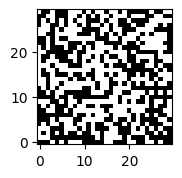

In [305]:
# image used to train the network
show_images_from_flatten_arrays([train_images], shape=shape, color_map=cmap)

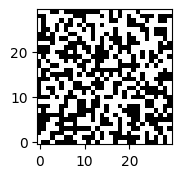

In [306]:
# image used to test the network
show_images_from_flatten_arrays([test], shape=shape, color_map=cmap)

In [307]:
net = nl.net.newhop([train_images])

In [308]:
output = net.sim([test])

In [309]:
output

array([[-1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,
        -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,
        -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
        -1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,
        -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,
        -1., -1., -1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,
         1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1.,
        -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,
         1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
         1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,
        -1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,
         1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,
        -1.,  1., -1.,  1., -1., -1., -1., -1.,  1.

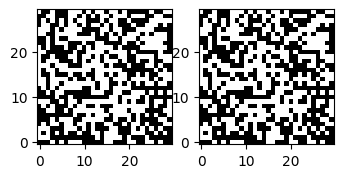

Score: 1.0


In [310]:
comp = (output == train_images)

show_images_from_flatten_arrays([output, train_images], shape, cmap)

print(f"Score: {count_score([train_images], [output])}")


## Test 02
Test with **n** images to learn and **m** images to test

Number of images to learn: 5
Drawn train images:


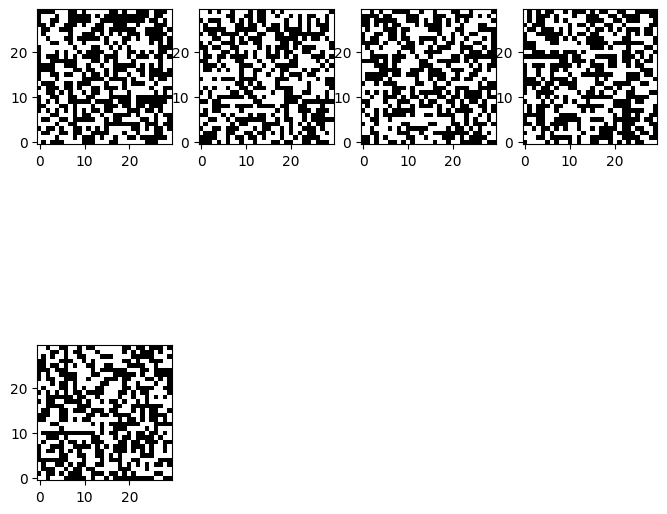

Number of images to test: 4
Drawn test images:


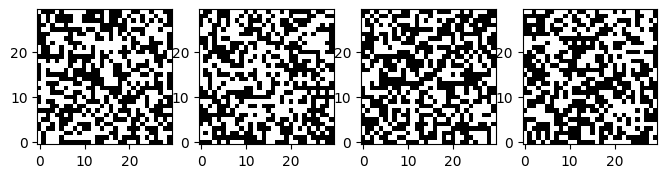

In [311]:
import random

n = 5
m = 4
random.shuffle(images)
train_data = images[:n]
test_data = images[n:n + m]

print(f"Number of images to learn: {n}")
print(f"Drawn train images:")
show_images(train_data, cmap)
print(f"Number of images to test: {m}")
print(f"Drawn test images:")
show_images(test_data, cmap)

In [312]:
train_images = []
for image in train_data:
    transformed = np.asarray(pd.DataFrame(image)).flatten()
    transformed[transformed == 0] = -1
    train_images.append(transformed)

test_images = []
for image in test_data:
    transformed = np.asarray(pd.DataFrame(image)).flatten()
    transformed[transformed == 0] = -1
    test_images.append(transformed)


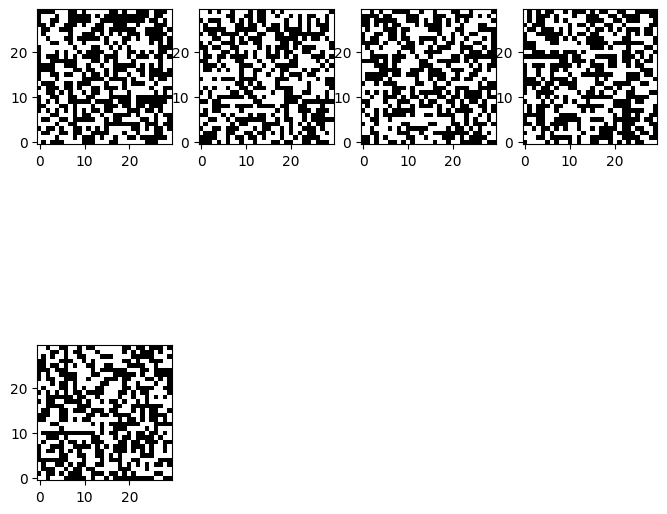

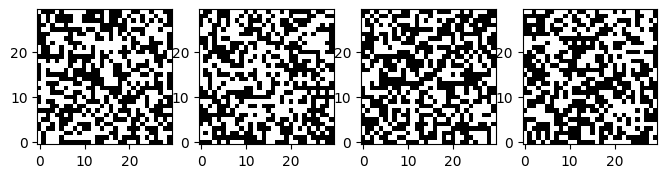

In [313]:
show_images_from_flatten_arrays(train_images, shape, cmap)
show_images_from_flatten_arrays(test_images, shape, cmap)

In [314]:
net = nl.net.newhop(train_images)

In [315]:
output = net.sim(test_images)

Score: 0.5
Drawn images to learn(test):


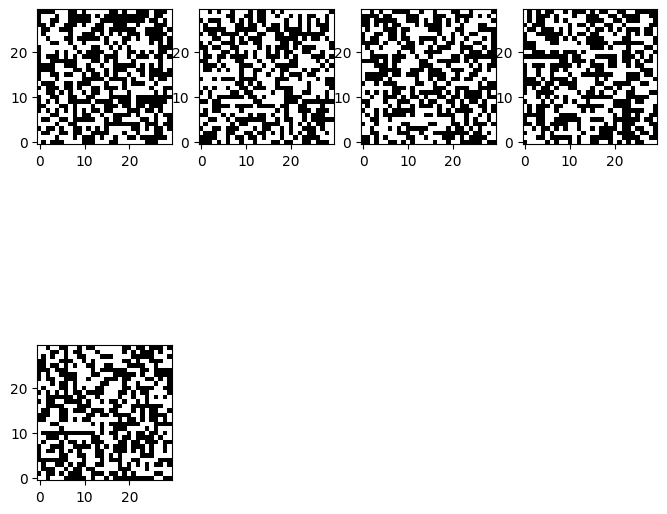

Output images:


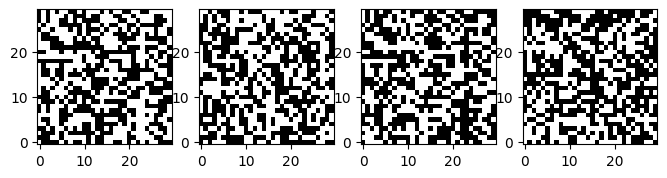

In [316]:
print(f"Score: {count_score(train_images, output)}")
print("Drawn images to learn (train):")
show_images_from_flatten_arrays(train_images, shape, cmap)
print("Output images:")
show_images_from_flatten_arrays(output, shape, cmap)